In [3]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [18]:
activities = pd.read_table('ucihar/cleaned_labels.txt', header=None, names=['activity'])
activities

,activity
0,WALKING
1,WALKING_UPSTAIRS
2,WALKING_DOWNSTAIRS
3,SITTING
4,STANDING
5,LAYING


In [19]:
readings = pd.read_csv('ucihar/cleaned_features.csv', index_col=0)
readings.head()

,reading
index,
1,tBodyAcc_mean_X
2,tBodyAcc_mean_Y
3,tBodyAcc_mean_Z
4,tBodyAcc_std_X
5,tBodyAcc_std_Y


In [20]:
column_names   = readings['reading'].values
X_train        = pd.read_csv('ucihar/train/X_train.csv', header=None, names=column_names)
X_train.head()

,tBodyAcc_mean_X,tBodyAcc_mean_Y,tBodyAcc_mean_Z,tBodyAcc_std_X,tBodyAcc_std_Y,tBodyAcc_std_Z,tBodyAcc_mad_X,tBodyAcc_mad_Y,tBodyAcc_mad_Z,tBodyAcc_max_X,...,fBodyGyroJerkMag_meanFreq,fBodyGyroJerkMag_skewness,fBodyGyroJerkMag_kurtosis,angle(tBodyAccMean_gravity),angle(tBodyAccJerkMean)_gravityMean),angle(tBodyGyroMean_gravityMean),angle(tBodyGyroJerkMean_gravityMean),angle(X_gravityMean),angle(Y_gravityMean),angle(Z_gravityMean)
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [21]:
X_train.shape

(7352, 561)

In [22]:
y_train = pd.read_table('ucihar/train/y_train.txt', header=None, names=['activity'])
y_train.head()

,activity
0,5
1,5
2,5
3,5
4,5


In [23]:
y_train.shape

(7352, 1)

In [25]:
# Join the real activity values with their plaintext descriptions.
activities_train = y_train.join(activities, on='activity', lsuffix='_L', rsuffix='_R')
activities_train.head()

,activity_L,activity_R
0,5,LAYING
1,5,LAYING
2,5,LAYING
3,5,LAYING
4,5,LAYING


In [26]:
activities_train.shape

(7352, 2)

In [27]:
df = X_train.join(activities_train)
df.head()

,tBodyAcc_mean_X,tBodyAcc_mean_Y,tBodyAcc_mean_Z,tBodyAcc_std_X,tBodyAcc_std_Y,tBodyAcc_std_Z,tBodyAcc_mad_X,tBodyAcc_mad_Y,tBodyAcc_mad_Z,tBodyAcc_max_X,...,fBodyGyroJerkMag_kurtosis,angle(tBodyAccMean_gravity),angle(tBodyAccJerkMean)_gravityMean),angle(tBodyGyroMean_gravityMean),angle(tBodyGyroJerkMean_gravityMean),angle(X_gravityMean),angle(Y_gravityMean),angle(Z_gravityMean),activity_L,activity_R
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,5,LAYING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,5,LAYING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,5,LAYING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,5,LAYING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,5,LAYING


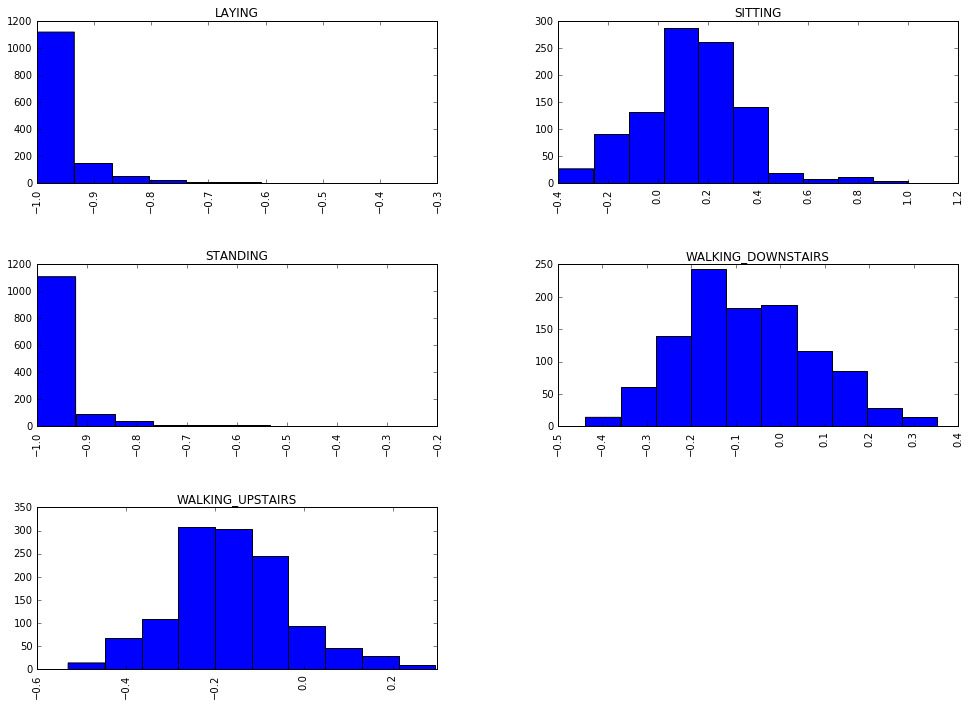

In [30]:
# Plot tBodyAccMag_mean for each activity on a histogram.
plt.figure()
df.hist(column='tBodyAccMag_mean', by='activity_R', figsize=(16, 12))
plt.show()